                        Project done by Michela Pirozzi MAT:732531 and Sara Ferioli MAT:733105

# LAB 3

## Goal

* Date le feature del dataset,  qualè la combinazione migliore che permette di avere un nuovo contratto (Es. INDETERMINATO) prima del covid? la combinazione di feature è la stessa anche dopo il covid?
* predirre numero di contratti

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import math
import sklearn
from sklearn import preprocessing
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from pandas.plotting import lag_plot
from pmdarima.arima import auto_arima
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Import data and analysis

In [2]:
# Load the dataset
join2 = pd.read_csv('file_name.csv')
join2 = join2.drop(labels='Unnamed: 0', axis=1)
join2

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y
0,F,60,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
1,F,33,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
2,F,45,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
3,F,61,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
4,F,20,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO
9329691,M,35,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO
9329692,M,27,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO


In [3]:
# Set generic category for the contracts 
join2.loc[join2['CONTRATTO'].str.match(r'.*INDETERMINATO.*') == True,"CONTRATTO"]="INDETERMINATO"
join2.loc[join2['CONTRATTO'].str.match(r'.*INDETERMINATO.*') == False,"CONTRATTO"]="NON INDETERMINATO"

indeterminato=join2
indeterminato

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO


### Label Encoder

In [4]:
# Starting the procedure to encode the data
titolostudio = indeterminato.TITOLOSTUDIO.tolist()
modlavoro = indeterminato.MODALITALAVORO.tolist()
prov = indeterminato.PROVINCIAIMPRESA.tolist()
nazionalita = indeterminato.ITALIANO.tolist()
copia = indeterminato.copy()

In [5]:
# Instantiate labelencoder object for each column that we want to encode
le_titolostudio = LabelEncoder()
le_modlavoro = LabelEncoder()
le_prov = LabelEncoder()
le_nazionalita = LabelEncoder()

In [6]:
# Apply the label encoder to the dataset
le_titolostudio.fit(copia['TITOLOSTUDIO'])
le_modlavoro.fit(copia['MODALITALAVORO'])
le_prov.fit(copia['PROVINCIAIMPRESA'])
le_nazionalita.fit(copia['ITALIANO'])

LabelEncoder()

In [7]:
# Transform into integers
transformation_ts = le_titolostudio.transform(indeterminato['TITOLOSTUDIO']) 
transformation_ts

array([8, 8, 8, ..., 8, 0, 0])

In [8]:
# Try to invert a transformation using the object
list(le_titolostudio.inverse_transform([8]))

['NESSUN TITOLO DI STUDIO']

In [9]:
# Transform into integers
transformation_ml = le_modlavoro.transform(indeterminato['MODALITALAVORO']) 
transformation_prov = le_prov.transform(indeterminato['PROVINCIAIMPRESA']) 
transformation_nazion = le_nazionalita.transform(indeterminato['ITALIANO']) 

In [10]:
# Apply label encoder on categorical feature columns
copia['titolostudio_transformed'] = list(transformation_ts)
copia['modalitalavoro_transformed'] = list(transformation_ml)
copia['provincia_transformed'] = list(transformation_prov)
copia['nazionalita_transformed'] = list(transformation_nazion)
copia

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,0,188
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,0,81
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,0,89
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,4,188
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO,0,5,0,89
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO,8,4,1,89
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO,8,4,7,89
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO,0,5,0,89


### Encoding Manually Ordinal Categorical Features

In [11]:
# Function to transform the columns ETA, nazionalita_transformed, genere_transformed in a unique column
# with the format: "ETA - nazionalita_transformed - genere_transformed"
# syntax:
# df: Dataframe
# column: column name of the new column
def trasformed_input(df,column):
    df[column] = df["Codice_ateco"].apply(str) + " - " + df["titolostudio_transformed"].apply(str)+ " - " + df["modalitalavoro_transformed"].apply(str)+ " - " + df["provincia_transformed"].apply(str)
    return df.drop(labels=['Codice_ateco','titolostudio_transformed','modalitalavoro_transformed','provincia_transformed'], axis=1)

In [12]:
# Function to retrive the original data from the trasformed ones
# syntax:
# df: Dataframe
# column: column name of the trasformed column
def inverse_trasformed_input(df,column):
    if type(df) is str:
        codice_ateco,titolostudio,modalitalavoro,provincia=df.split(" - ")
        print("Codice_ateco: "+codice_ateco+" titolostudio: "+titolostudio+" modalitalavoro: "+modalitalavoro+" provincia: "+provincia)
        return codice_ateco,titolostudio,modalitalavoro,provincia
    
    df[['Codice_ateco','titolostudio_transformed','modalitalavoro_transformed','provincia_transformed']] = df[column].str.split(" - ",expand=True,)
    return df.drop(labels =[column], axis=1)

In [13]:
# Function to retrive the original data from the trasformed ones
# syntax:
# value: trasfomed value
# return 'M' if value is 0 otherwise 'F'
def gender(value):
    if value=='0':
        return 'M'
    else:
        return 'F'

In [14]:
# Create mapper
scale_mapper = {'NON INDETERMINATO':0, 'INDETERMINATO':1}

# Map feature values to scale
copia['contratto_transformed'] = copia['CONTRATTO'].replace(scale_mapper)
copia

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,contratto_transformed
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,0,188,0
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,0,81,0
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,0,89,0
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,4,188,0
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO,0,5,0,89,0
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO,8,4,1,89,0
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO,8,4,7,89,0
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO,0,5,0,89,0


In [15]:
# Create mapper
scale_mapper = {'M':0, 'F':1}

# Map feature values to scale
copia['genere_transformed'] = copia['GENERE'].replace(scale_mapper)
copia

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,contratto_transformed,genere_transformed
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,0,188,0,1
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,0,81,0,1
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,0,89,0,1
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,4,188,0,1
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,89,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO,0,5,0,89,0,0
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO,8,4,1,89,0,0
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO,8,4,7,89,0,0
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO,0,5,0,89,0,0


In [16]:
# Trasform the column in int type
copia['Codice_ateco']=copia.Codice_ateco.astype(int)

# We remove the outliers. 
copia = copia[copia['ETA']>=15]
copia = copia[copia['ETA']<100]
copia = copia[copia['anno']<2022]
copia = copia[copia['anno']>2006]
copia

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,contratto_transformed,genere_transformed
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,0,188,0,1
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,0,81,0,1
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,0,89,0,1
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,4,188,0,1
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,89,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO,0,5,0,89,0,0
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO,8,4,1,89,0,0
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO,8,4,7,89,0,0
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO,0,5,0,89,0,0


In [17]:
'''# anni prima del covid
copia = copia[copia['anno']<2019]
copia'''

"# anni prima del covid\ncopia = copia[copia['anno']<2019]\ncopia"

In [18]:
# Drop the columns that have been transformed
transformed_indet = copia.drop(labels =['GENERE', 'TITOLOSTUDIO', 'MODALITALAVORO', 'PROVINCIAIMPRESA', 'ITALIANO', 'SETTOREECONOMICODETTAGLIO_y', 'CONTRATTO'], axis=1)
transformed_indet

,ETA,anno,mese-anno,Codice_ateco,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,contratto_transformed,genere_transformed
0,60,2020,2020-05,97,8,4,0,188,0,1
1,33,2012,2012-07,97,8,2,0,81,0,1
2,45,2019,2019-04,97,8,4,0,89,0,1
3,61,2014,2014-09,97,8,4,4,188,0,1
4,20,2014,2014-05,97,8,2,4,89,0,1
...,...,...,...,...,...,...,...,...,...,...
9329690,36,2012,2012-07,12,0,5,0,89,0,0
9329691,35,2011,2011-07,12,8,4,1,89,0,0
9329692,27,2009,2009-04,12,8,4,7,89,0,0
9329693,37,2012,2012-06,12,0,5,0,89,0,0


In [19]:
# Change the type of all column
transformed_indet['Codice_ateco'] = transformed_indet['Codice_ateco'].astype(str).astype(int)
transformed_indet.dtypes

ETA                            int64
anno                           int64
mese-anno                     object
Codice_ateco                   int64
titolostudio_transformed       int64
modalitalavoro_transformed     int64
provincia_transformed          int64
nazionalita_transformed        int64
contratto_transformed          int64
genere_transformed             int64
dtype: object

In [20]:
# Encoding of the input
transformed_indet=trasformed_input(transformed_indet,'Output')
transformed_indet

,ETA,anno,mese-anno,nazionalita_transformed,contratto_transformed,genere_transformed,Output
0,60,2020,2020-05,188,0,1,97 - 8 - 4 - 0
1,33,2012,2012-07,81,0,1,97 - 8 - 2 - 0
2,45,2019,2019-04,89,0,1,97 - 8 - 4 - 0
3,61,2014,2014-09,188,0,1,97 - 8 - 4 - 4
4,20,2014,2014-05,89,0,1,97 - 8 - 2 - 4
...,...,...,...,...,...,...,...
9329690,36,2012,2012-07,89,0,0,12 - 0 - 5 - 0
9329691,35,2011,2011-07,89,0,0,12 - 8 - 4 - 1
9329692,27,2009,2009-04,89,0,0,12 - 8 - 4 - 7
9329693,37,2012,2012-06,89,0,0,12 - 0 - 5 - 0


In [21]:
# With LabelEncoder we encode the input column
copia = transformed_indet.copy()
le_output = LabelEncoder()
le_output.fit(copia['Output'])
transformation_output = le_output.transform(transformed_indet['Output']) 
copia['Output_transformed'] = list(transformation_output)
copia=copia.drop(labels =['Output'], axis=1)
copia

,ETA,anno,mese-anno,nazionalita_transformed,contratto_transformed,genere_transformed,Output_transformed
0,60,2020,2020-05,188,0,1,32612
1,33,2012,2012-07,81,0,1,32591
2,45,2019,2019-04,89,0,1,32612
3,61,2014,2014-09,188,0,1,32618
4,20,2014,2014-05,89,0,1,32597
...,...,...,...,...,...,...,...
9329690,36,2012,2012-07,89,0,0,1349
9329691,35,2011,2011-07,89,0,0,1350
9329692,27,2009,2009-04,89,0,0,1351
9329693,37,2012,2012-06,89,0,0,1349


### Balancing

In [22]:
# Check if the dataset is balanced
copia["contratto_transformed"].value_counts(normalize=True)

0    0.854901
1    0.145099
Name: contratto_transformed, dtype: float64

We notice that the dataset is not balanced basing on the type of contract

#### Random Undersampling

We use undersampling instead of oversampling because we care more about the INDETERMINATO's contracts which have less occurencies, even if there are the possibilities to lose some informations.

In [23]:
# Count the occurencies of INDETERMINATO's contracts
copia[copia["contratto_transformed"]==1].count()

ETA                        1351972
anno                       1351972
mese-anno                  1351972
nazionalita_transformed    1351972
contratto_transformed      1351972
genere_transformed         1351972
Output_transformed         1351972
dtype: int64

In [24]:
# Count the occurencies of NON INDETERMINATO's contracts
copia[copia["contratto_transformed"]==0].count()

ETA                        7965631
anno                       7965631
mese-anno                  7965631
nazionalita_transformed    7965631
contratto_transformed      7965631
genere_transformed         7965631
Output_transformed         7965631
dtype: int64

In [25]:
# Execute the undersampling for the NON INDETERMINATO's contracts
data_0 = copia[copia["contratto_transformed"]==0].sample(n=1351972,random_state=16) 
data_1 = copia[copia["contratto_transformed"]==1]
balanced = data_0.append(data_1)
balanced

,ETA,anno,mese-anno,nazionalita_transformed,contratto_transformed,genere_transformed,Output_transformed
4956398,25,2014,2014-11,89,0,1,13966
3997191,46,2011,2011-12,89,0,0,13797
3184721,24,2016,2016-01,144,0,0,6674
6627125,38,2020,2020-07,89,0,1,26059
2405463,32,2012,2012-05,89,0,1,26698
...,...,...,...,...,...,...,...
9329673,26,2019,2019-02,89,1,1,18030
9329675,28,2014,2014-09,89,1,1,18031
9329683,33,2009,2009-01,89,1,0,18036
9329685,34,2021,2021-08,89,1,0,18031


In [26]:
# Check if the dataset is balanced
balanced["contratto_transformed"].value_counts(normalize=True)

0    0.5
1    0.5
Name: contratto_transformed, dtype: float64

#### Create the train and test sets

In [27]:
# Create the train and test sets
X = balanced[["ETA","anno","contratto_transformed","nazionalita_transformed","genere_transformed"]].values
y = pd.DataFrame(balanced['Output_transformed'].copy()).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [29]:
X_train

array([[  46, 2012,    1,   89,    1],
       [  40, 2019,    1,   89,    0],
       [  50, 2017,    0,   89,    0],
       ...,
       [  43, 2020,    1,   89,    0],
       [  18, 2013,    1,   89,    0],
       [  25, 2013,    0,   89,    1]])

#### Find the best max_depth

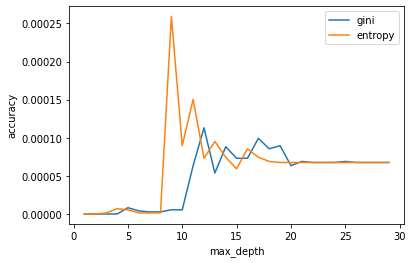

In [39]:
# Find the max depth neccessary for the Decision tree
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
     dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
     dtree.fit(X_train, y_train)
     pred = dtree.predict(X_test)
     acc_gini.append(accuracy_score(y_test, pred))
     ####
     dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
     dtree.fit(X_train, y_train)
     pred = dtree.predict(X_test)
     acc_entropy.append(accuracy_score(y_test, pred))
     ####
     max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

We notice that the best accuracy is when max_depth is (more or less) equal to 12.

### Decision Tree

In [28]:
# Method that allow to calculate the decision tree
# syntax:
# X_train: input train dataframe
# y_train: output train dataframe
def dct(X_train, y_train):
    dct = tree.DecisionTreeClassifier()
    
    DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, #provare con 12?
                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                           random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                           class_weight=None)
    
    return dct

In [29]:
# To avoid the MemoryError, we change the dataset's type into a new lighter one
X_train=X_train.astype(np.uint8)
y_train=y_train.astype(np.uint8)

In [30]:
# Create Decision tree and fit it
dct = dct(X_train, y_train)
dct.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# With the following sintax we will create a .dot file with the code for visualizing th tree
tree.export_graphviz(dct, out_file='tree.dot', feature_names=["ETA","anno","contratto_transformed","nazionalita_transformed","genere_transformed"])

In [ ]:
# to chek
graph=pydotplus.graph_from_dot_data('tree.dot')
graph.write_png('tree.png')  

plt.imshow(plt.imread('tree.png'))

In [32]:
# Show Decision tree
tree.plot_tree(dct)

[Text(0.4547003625104464, 0.9864864864864865, 'X[3] <= 61.5\ngini = 0.994\nsamples = 1691567\nvalue = [14856, 6794, 6396, 3666, 4991, 2795, 10003, 6221\n13433, 6630, 5109, 3619, 8670, 3924, 4069, 2272, 5064\n2393, 6477, 5455, 3270, 4595, 6859, 3030, 5307, 5696\n2328, 3015, 3274, 2922, 11007, 6435, 3430, 5210, 4994\n3100, 9142, 4770, 3175, 3084, 4019, 6368, 38676, 4769\n3224, 5329, 5873, 3180, 4586, 8203, 5193, 23772, 9737\n7818, 20139, 7598, 5485, 13167, 4109, 21243, 15203\n17965, 5464, 4600, 4029, 7326, 11001, 2887, 4838, 9611\n4446, 5588, 11451, 5734, 20019, 4060, 4387, 7650, 9847\n5468, 5006, 7819, 3945, 2831, 2965, 7514, 6356, 6103\n4119, 4799, 5177, 6233, 3591, 4953, 6503, 5572, 6736\n3335, 2721, 4957, 2253, 2780, 3955, 3455, 2557, 5565\n16039, 2763, 4187, 4781, 5559, 4736, 4767, 4786, 15933\n11188, 5848, 5175, 10732, 3253, 11468, 3476, 6294\n2617, 4272, 5101, 6389, 6319, 3131, 4479, 8112, 7976\n2656, 5756, 7442, 3868, 5940, 3217, 3931, 19013, 7233\n4114, 13493, 5244, 4533, 4716, 

Error in callback <function flush_figures at 0x0000024CC5FBF790> (for post_execute):


KeyboardInterrupt: 

In [33]:
# Predict the values
y_pred = dct.predict(X_test)
y_pred

In [34]:
# Probablistic prediction the values
y_pred = dct.predict_proba(X_test)
y_pred

### Prune the tree

#### Best Depth Tree

In [40]:
# Calculate the max depth in the decision tree ?????
max_depth = dct.get_depth()
max_depth

36

In [42]:
#
max_depth_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                    scoring=make_scorer(accuracy_score),
                                    param_grid=ParameterGrid({"max_depth":[[max_depth] for max_depth in range(1, max_depth+1)]}),)
max_depth_grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# 
max_depth_grid_search.best_params_

In [ ]:
# 
best_max_depth_tree=max_depth_grid_search.best_estimator_
best_max_depth = best_max_depth_tree.get_depth()

plt.figure(figsize=(4,4), dpi=1000)
plot_tree(best_max_depth_tree,
         feature_names=["ETA","anno","contratto_transformed","nazionalita_transformed","genere_transformed"],
          filled=True,)
plt.show()

#### Pruned Tree

In [ ]:
# To avoid the MemoryError, we change the dataset's type into a new lighter one
X_train=X_train.astype(np.uint8)
y_train=y_train.astype(np.uint8)

In [ ]:
#
path = dct.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                    scoring=make_scorer(accuracy_score),
                                    param_grid=ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),)
ccp_alphas_grid_search.fit(X_train, y_train)

In [ ]:
#
ccp_alphas_grid_search.best_params_

In [ ]:
#
best_ccp_alphas_tree=ccp_alphas_grid_search.best_estimator_

plt.figure(figsize=(4,4), dpi=1000)
plot_tree(best_ccp_alphas_tree,
         feature_names=["ETA","anno","contratto_transformed","nazionalita_transformed","genere_transformed"], 
          filled=True,)
plt.show()

#### Pre-Pruning

In [ ]:
#
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=dct,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

In [ ]:
#
print(grid_search.best_params_)

In [ ]:
#
clf=DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [ ]:
# Predict the values
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

#### Post pruning techniques

dà errore

In [ ]:
# To avoid the MemoryError, we change the dataset's type into a new lighter one
X_train=X_train.astype(np.uint8)
y_train=y_train.astype(np.uint8)

In [ ]:
#
path = dct.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
#
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

### SVM - Support Vector Machine

In [ ]:
print("Training SVC Classifier...")

from sklearn import svm
from sklearn.svm import SVC

# initial C = 1 and initial gamma = 0.001
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model = SVC(kernel='rbf', C=1, gamma=0.001)
model.fit(X_train, y_train)

Training SVC Classifier...


In [ ]:
print("Scoring SVC Classifier...")

score = model.score(X_test, y_test)
print("Score:\n", round(score, 6))

In [ ]:
def drawPredictions(X_train, X_test, y_train, y_test):
    fig = plt.figure()
    fig.set_tight_layout(True)
    
    # Make some guesses
    y_guess = model.predict(X_test)

    num_rows = 5
    num_cols = 5

    index = 0
    for col in range(num_cols):
        for row in range(num_rows):
            fig.add_subplot(num_cols, num_rows, index + 1)
            
            # 8x8 is the size of the image, 64 pixels
            plt.imshow(pd.DataFrame(X_test.iloc[index,:]).values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

            # Green = Guessed right
            # Red = Fail!
            fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
            plt.title('Label: %i' % y_guess[index], fontsize=10, color=fontcolor)
            plt.axis('off')
            index += 1


In [ ]:
# Let's get some visual confirmation of accuracy:
drawPredictions(X_train, X_test, y_train, y_test)

###  K-Nearest Neighbors Classification

In [30]:

def scaleFeaturesDF(data_train, data_test):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    transf = preprocessing.MinMaxScaler().fit(data_train)
    data_train = transf.transform(data_train)
    data_train = pd.DataFrame(data_train)
    data_test = transf.transform(data_test)
    data_test = pd.DataFrame(data_test)
    
    
    return data_train, data_test

In [31]:
[X_train, X_test]=scaleFeaturesDF(X_train, X_test) # magari si può togliere questo

In [ ]:
knmodel = KNeighborsClassifier(n_neighbors =5, weights='uniform')
knmodel.fit(X_train, y_train)

### Confusion Matrix

Non eseguire

In [ ]:
'''import matplotlib.pyplot as plt

columns = balanced['Output_transformed'].distinct()
confusion = metrics.confusion_matrix(y_true, y_pred)

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2], columns, rotation='vertical')
plt.yticks([0,1,2], columns)
plt.colorbar()

plt.show()'''

In [ ]:
# Show the confusion matrix
columns = balanced['Output_transformed'].distinct()
confusion = metrics.confusion_matrix(y_test, y_pred)

fig=px.imshow(confusion,color_continuous_scale='blues')

fig.update_layout(
    xaxis = dict(
        tickvals =[0,1,2],
        ticktext = columns
    ),
    yaxis = dict(
        tickvals =[0,1,2],
        ticktext = columns
    )
)

fig.show()

### ARIMA

Prediction of the number of activated contracts wiht Autoregressive integrated moving average model.

In [28]:
# Load the dataset
balanced
bal1 = balanced.copy()
bal1 = bal1.reset_index(drop=True)
bal1

,ETA,anno,mese-anno,nazionalita_transformed,contratto_transformed,genere_transformed,Output_transformed
0,25,2014,2014-11,89,0,1,13966
1,46,2011,2011-12,89,0,0,13797
2,24,2016,2016-01,144,0,0,6674
3,38,2020,2020-07,89,0,1,26059
4,32,2012,2012-05,89,0,1,26698
...,...,...,...,...,...,...,...
2703939,26,2019,2019-02,89,1,1,18030
2703940,28,2014,2014-09,89,1,1,18031
2703941,33,2009,2009-01,89,1,0,18036
2703942,34,2021,2021-08,89,1,0,18031


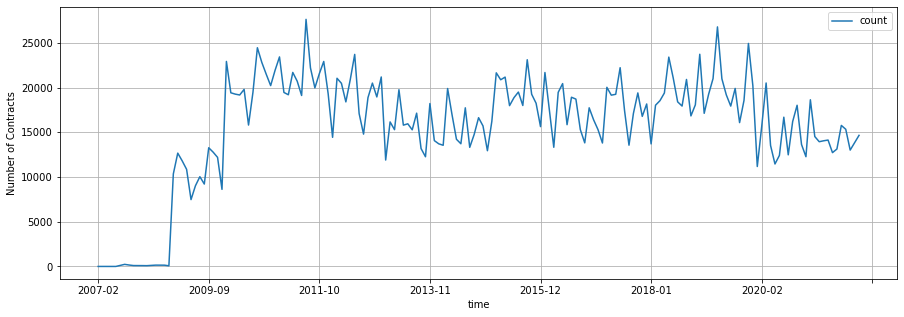

In [29]:
# Set mese-anno like index
# Show count of contract for each mese-anno
bal2 = bal1.groupby("mese-anno").size().reset_index(name='count')
bal2 = bal2.set_index('mese-anno')
f, ax1 = plt.subplots(1,1,figsize=(15,5))
bal2.plot(ax=ax1)
ax1.set_xlabel("time")
ax1.set_ylabel("Number of Contracts")
plt.grid(True)

In [30]:
# Calculate the Augmented Dickey-Fuller test can be used to test for a unit root in a univariate 
#process in the presence of serial correlation.
results = adfuller(bal2['count'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -4.621934
p-value: 0.000118


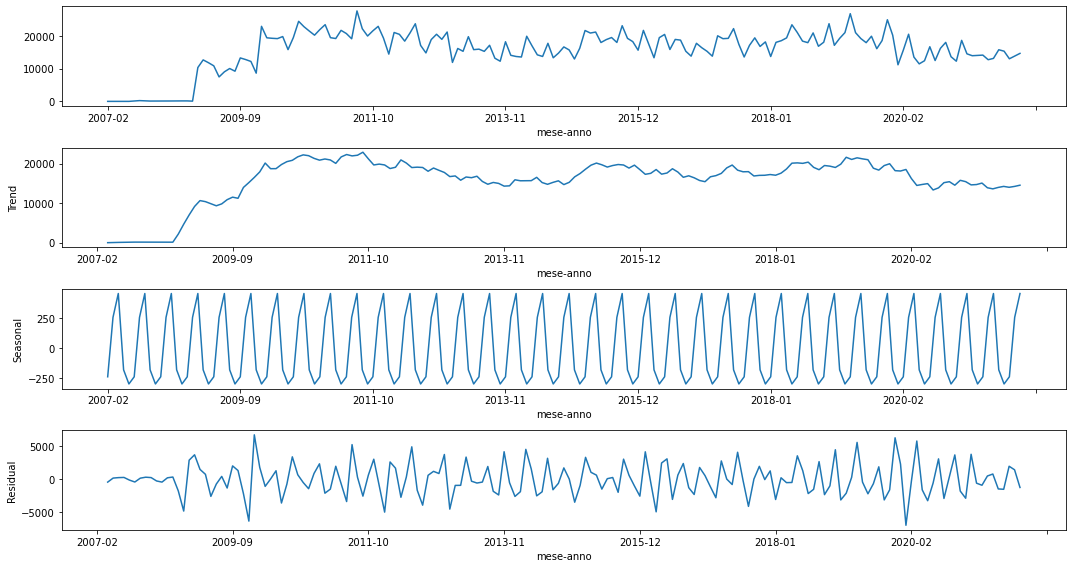

In [48]:
# Show seasonality and trend
plt.rcParams['figure.figsize'] = 20, 10
# Additive decomposition
decomposed_add = seasonal_decompose(bal2, model="additive", period=5)

fig, ax = plt.subplots(4, 1, figsize=(15, 8))
# Plot the series
decomposed_add.observed.plot(ax = ax[0])
decomposed_add.trend.plot(ax = ax[1])
decomposed_add.seasonal.plot(ax = ax[2])
decomposed_add.resid.plot(ax = ax[3])
# Add the labels to the Y-axis
ax[0].set_ylabel('')
ax[1].set_ylabel('Trend')
ax[2].set_ylabel('Seasonal')
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

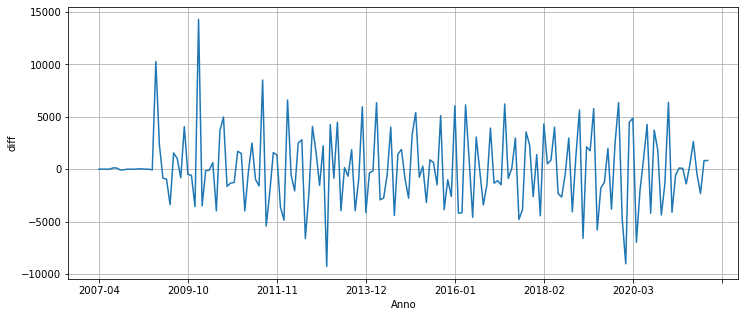

In [49]:
# Calculate differential
bal_diff = bal2['count'].diff().dropna()
plt.figure(figsize=(12,5))
ax1 = bal_diff.plot()
ax1.set_xlabel("Anno")
ax1.set_ylabel("diff")
plt.grid(True)
plt.show()

In [54]:
# Calculate the Augmented Dickey-Fuller test

results = adfuller(bal_diff)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -2.966888
p-value: 0.038105


In [55]:
# Calculate the Augmented Dickey-Fuller test
results = adfuller(bal2['count'].diff().diff().dropna())
print('ADF Statistic: %f' % results[0])
print("P-value of a test is: {}".format(results[1]))

ADF Statistic: -7.803319
P-value of a test is: 7.393489604570504e-12


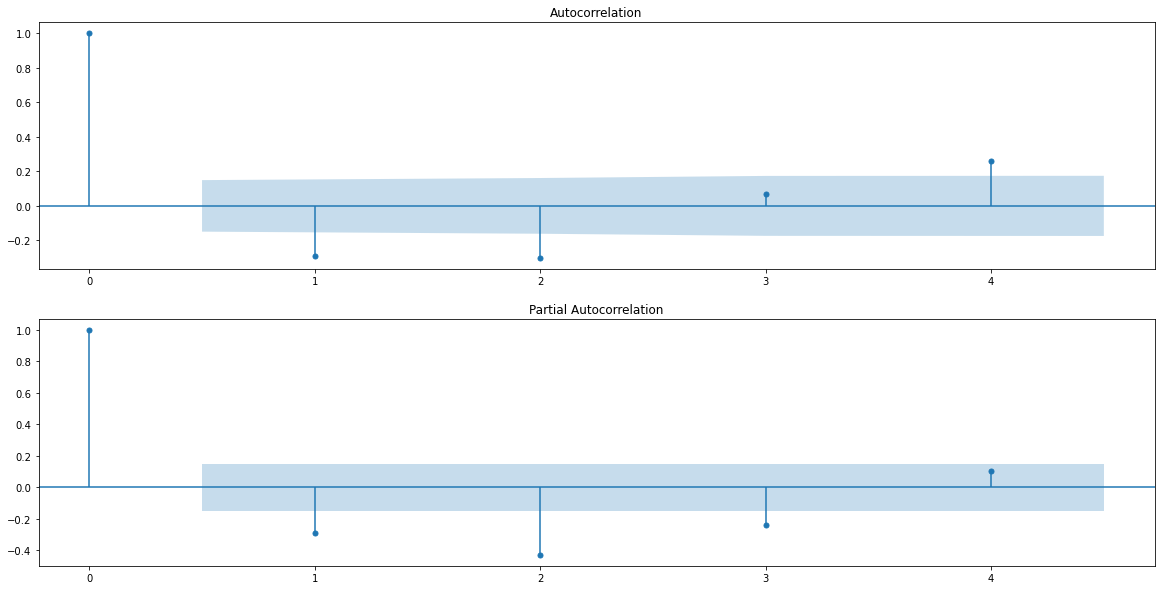

In [56]:
# Show autocorrelation and partial correlation
fig,ax = plt.subplots(2,1,figsize=(20,10))
plot_acf(bal_diff, lags=4, ax=ax[0])
plot_pacf(bal_diff, lags=4, ax=ax[1])
plt.show()

In [58]:
# Search p and q values

arima_df = pd.DataFrame(columns=["p","q","aic","bic"])

i=0
# Loop over p values from 0-5
for p in range(4):
    # Loop over q values from 0-5
    for q in range(4):
        
        try:
            # creating and fitting ARIMA(p,1,q) model
            model = ARIMA(bal2['count'].astype(float), order=(p,1,q))
            results = model.fit()
            
            # Printing order, AIC and BIC
            #print(p, q, results.aic, results.bic)
            arima_df.loc[i,"p"] = p
            arima_df.loc[i,"q"] = q
            arima_df.loc[i,"aic"] = results.aic
            arima_df.loc[i,"bic"] = results.bic
            i = i+1
        except:
            #print(p, q, None, None)
            i = i+1
    
arima_df["sum_aic_bic"] = arima_df["aic"]+arima_df["bic"]
arima_df.sort_values(by="aic", ascending=False, inplace=True)
arima_df

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.58456D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     18      1     0     0   0.000D+00   9.585D+00
  F =   9.5845564107883572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.54060D+00    |proj g|=  8.45368D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   0.000D+00   9.541D+00
  F =   9.5406019639703370     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41557D+00    |proj g|=  1.59375D-03

At iterate    5    f=  9.41554D+00    |proj g|=  5.45874D-04

At iterate   10    f=  9.41554D+00    |proj g|=  1.82965D-05

At iterate   15    f=  9.41554D+00    |proj g|=  4.54570D-04

At iterate   20    f=  9.41547D+00    |proj g|=  1.41807D-03

At iterate   25    f=  9.41546D+00    |proj g|=  3.90799D-05

At iterate   30    f=  9.41546D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44305D+00    |proj g|=  2.46061D-03

At iterate    5    f=  9.44303D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   1.776D-07   9.443D+00
  F =   9.4430342593513785     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41493D+00    |proj g|=  2.46345D-03

At iterate    5    f=  9.41491D+00    |proj g|=  3.55272D-07

At iterate   10    f=  9.41491D+00    |proj g|=  8.88178D-07

At iterate   15    f=  9.41491D+00    |proj g|=  1.24345D-06

At iterate   20    f=  9.41491D+00    |proj g|=  5.32907D-07

At iterate   25    f=  9.41491D+00    |proj g|=  1.95399D-06

At iterate   30    f=  9.41491D+00    |proj g|=  3.10862D-05

At iterate   35    f=  9.41491D+00    |proj g|=  1.19194D-04

At iterate   40    f=  9.41491D+00    |proj g|=  1.42109D-05

At iterate   45    f=  9.41491D+00    |proj g|=  1.06581D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


,p,q,aic,bic,sum_aic_bic
0,0,0,3301.087405,3307.382394,6608.4698
4,1,0,3287.967076,3297.409559,6585.376635
1,0,1,3259.307441,3268.749925,6528.057366
5,1,1,3259.26229,3271.852268,6531.114558
6,1,2,3257.405645,3273.143118,6530.548763
2,0,2,3257.037372,3269.62735,6526.664721
8,2,0,3256.403785,3268.993763,6525.397548
3,0,3,3254.121585,3269.859057,6523.980642
10,2,2,3252.456286,3271.341253,6523.797538
7,1,3,3250.91884,3269.803806,6520.722646


In [59]:
# Compute the model
model2 = SARIMAX(bal2, order=(2,1,1), seasonal_order=(0,1,0,6))
results = model2.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35351D+00    |proj g|=  4.62874D-02

At iterate    5    f=  9.34613D+00    |proj g|=  1.03059D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   1.253D-06   9.346D+00
  F =   9.3460245327993778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                  173
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 6)   Log Likelihood               -1616.862
Date:                            Thu, 19 May 2022   AIC                           3241.724
Time:                                    15:07:42   BIC                           3254.172
Sample:                                         0   HQIC                          3246.777
                                            - 173                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2722      0.151     -1.807      0.071      -0.567       0.023
ar.L2         -0.4790      0.094     -5.083      0.000      -0.664      -0.294
ma.L1         -0.2461      0.153     -1.613      0.107      -0.545       0.053
sigma2       1.68e+07   1.59e+06     10.588      0.000    1.37e+07    1.99e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 4.51
Prob(Q):                              0.75   Prob(JB):                         0.10
Heteroskedasticity (H):               0.79   Skew:                             0.09
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

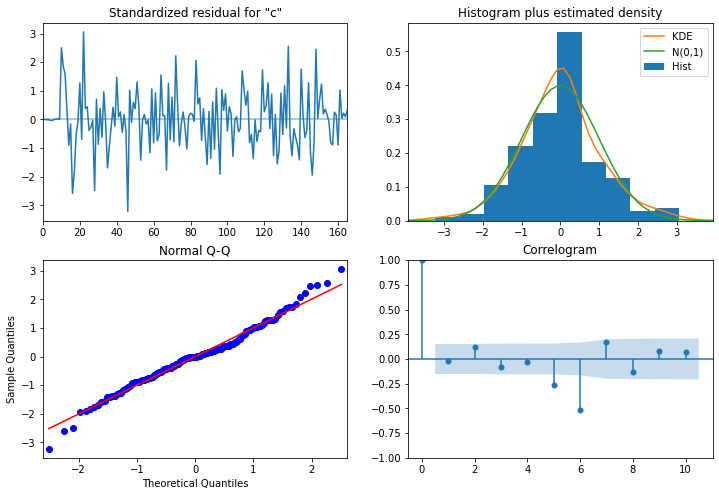

In [60]:
# Show ---
plt.rcParams['figure.figsize'] = 12, 8
plot = results.plot_diagnostics()

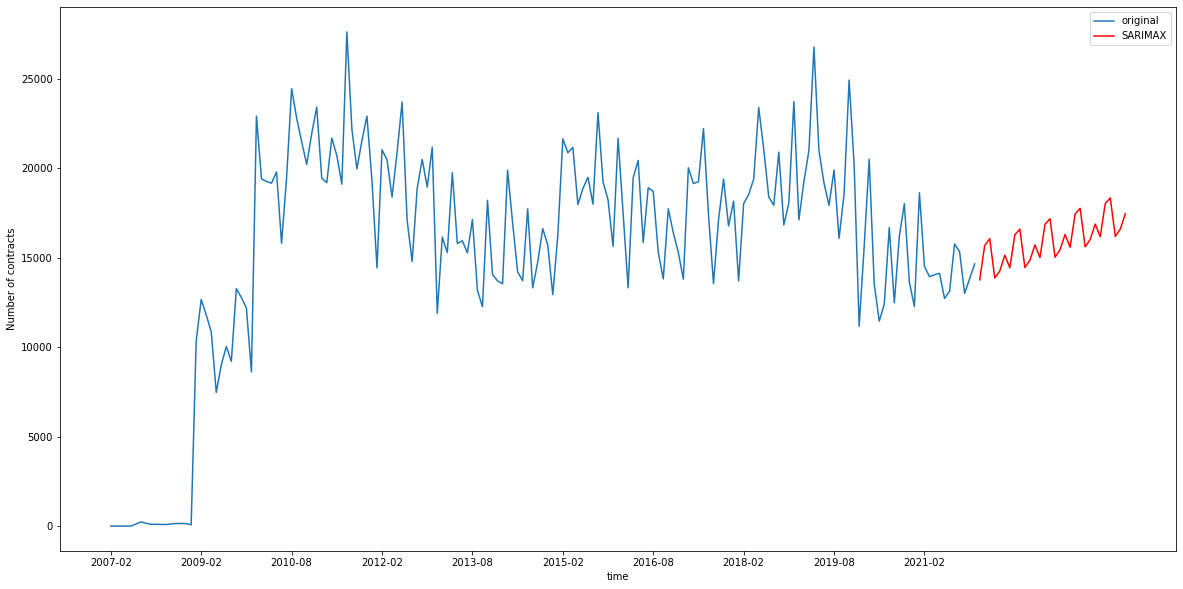

In [61]:
# Prediction of the future

# Create SARIMA mean forecast
forecast = results.get_forecast(steps=30)
lower = forecast.conf_int()["lower count"]
upper = forecast.conf_int()["upper count"]

# Plot mean SARIMA predictions
fig,ax = plt.subplots(1,1,figsize=(20,10))

plt.plot(bal2, label='original')
plt.plot(forecast.predicted_mean, label='SARIMAX', c="r")

plt.xticks(bal2.index.unique())
plt.locator_params(axis='x', nbins=10)

plt.xlabel('time')
plt.ylabel('Number of contracts')
plt.legend()
plt.show()

# Featuring engineering

In [80]:
# Featuring engineering
# Lag features and Shift index
for i in range(1,3):
    lag_i = 'lag_' + str(i)
    bal2[lag_i] = bal2['count'].shift(i)
    
# Rolling window
bal2['rolling_mean'] = bal2['count'].rolling(window=2).mean()
bal2['rolling_max'] = bal2['count'].rolling(window=2).max()
bal2['rolling_min'] = bal2['count'].rolling(window=2).min()

#### Correlation Feature

<AxesSubplot:>

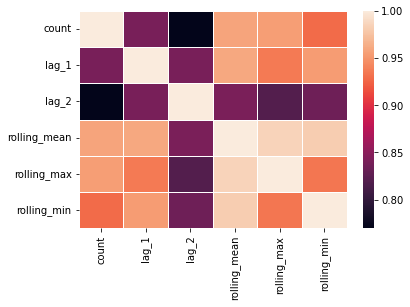

In [81]:
corr = bal2.corr()
fig = plt.figure(figsize=(6,4))
sns.heatmap(corr, linewidths=.5)

In [82]:
# to check
# Show the confusion matrix
#corr = bal2.corr()
#fig=px.imshow(confusion)
#non funziona

In [84]:
# Inference: count is less correlated with lag_1 and lag_2. Hence removing them from dataset.
# Capire qual è quello meno correlato e levarlo
bal2 = bal2[["rolling_mean","rolling_max", "rolling_min", "count"]]
print('Shape:', bal2.shape)
bal2.head()

Shape: (173, 4)


,rolling_mean,rolling_max,rolling_min,count
mese-anno,,,,
2007-02-01,NaN,NaN,NaN,2
2007-04-01,1.5,2.0,1.0,1
2007-06-01,1.0,1.0,1.0,1
2007-10-01,1.0,1.0,1.0,1
2007-11-01,1.0,1.0,1.0,1


In [85]:
# Fill NaN values with mean value
bal2.fillna(bal2.mean(), inplace = True)
bal2.head()

,rolling_mean,rolling_max,rolling_min,count
mese-anno,,,,
2007-02-01,15677.985465,16997.05814,14358.912791,2
2007-04-01,1.500000,2.00000,1.000000,1
2007-06-01,1.000000,1.00000,1.000000,1
2007-10-01,1.000000,1.00000,1.000000,1
2007-11-01,1.000000,1.00000,1.000000,1


In [173]:
# Show the dimension of the dataset to calculate the train and the test
bal2.shape

(173, 4)

In [88]:
# Split the time series data (Train-80, Test-20)
print('Total records in dataset:', len(bal2))
contract_train = bal2.iloc[0:138]               
contract_test = bal2.iloc[138:]

contract_pred_train = bal2.iloc[0:138]               
contract_pred_test = bal2.iloc[138:]
print('Total records in Training set:', len(contract_train))
print('Total records in Test set:', len(rcontract_test))

Total records in dataset: 173
Total records in Training set: 138
Total records in Test set: 35


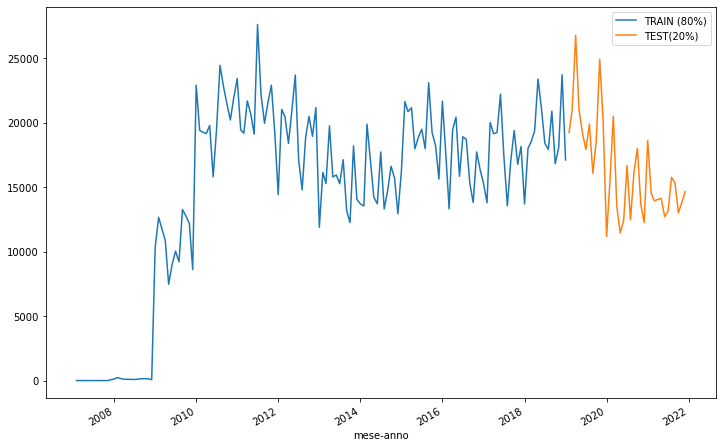

In [89]:
# Plot train and test sets
contract_train['count'].plot(legend=True,label='TRAIN (80%)')
contract_test['count'].plot(legend=True,label='TEST(20%)',figsize=(12,8));

In [90]:
# Delete the feature to predict
X_train = contract_train.drop(['count'], axis=1)
y_train = contract_train['count'].values

X_test = contract_test.drop(['count'], axis=1)
y_test = contract_test['count'].values

In [91]:
# Delete the feature to predict
X_pred_train = contract_pred_train.drop(['count'], axis=1)
y_pred_train = contract_pred_train['count'].values

X_pred_test = contract_pred_test.drop(['count'], axis=1)
y_pred_test = contract_pred_test['count'].values

#### Holt winter

Holt-Winters forecasting is a way to model and predict the behavior of a sequence of values over time—a time series.
Holt-Winters is a way to model three aspects of the time series: a typical value (average), a slope (trend) over time, and a cyclical repeating pattern (seasonality).

In [186]:
# Modeling the simple exponential smoothing
ses_model = SimpleExpSmoothing(contract_train['count']).fit(smoothing_level=0.3)
ses_preds = ses_model.forecast(steps = 35) 

In [185]:
# Calculate the errors
ses_errors_df = contract_test[['count']]
ses_errors_df['Predicted_Count'] = ses_preds.values
ses_errors_df['Error'] = ses_preds.values - y_test
ses_errors_df.insert(0, 'Modelname', 'Holtman- SES')

In [154]:
# Modeling the double exponential smoothing
double_model = ExponentialSmoothing(contract_train['count'],trend='add').fit()
doublemodel_preds = double_model.forecast(35).rename('DES Forecast')

In [156]:
# Calculate the errors
des_errors_df = contract_test[['count']]
des_errors_df['Predicted_Count'] = doublemodel_preds.values
des_errors_df['Error'] = doublemodel_preds.values - y_test
des_errors_df.insert(0, 'Modelname', 'Holtman- DES')
des_errors_df.head()

,Modelname,count,Predicted_Count,Error
mese-anno,,,,
2019-02-01,Holtman- DES,19251,19159.442499,-91.557501
2019-03-01,Holtman- DES,21004,19160.351139,-1843.648861
2019-04-01,Holtman- DES,26785,19161.259778,-7623.740222
2019-05-01,Holtman- DES,20982,19162.168418,-1819.831582
2019-06-01,Holtman- DES,19182,19163.077058,-18.922942


In [157]:
# Modeling the triple exponential smoothing
triple_model = ExponentialSmoothing(contract_train['count'],trend='add', seasonal= 'mul',seasonal_periods= 12).fit(use_boxcox=False, remove_bias=False)
tes_forecast = triple_model.forecast(35).rename('TES_Forecast')

In [158]:
# Calculate the errors
tes_errors_df = contract_test[['count']]
tes_errors_df['Predicted_Count'] = tes_forecast.values
tes_errors_df['Error'] = tes_forecast.values - y_test
tes_errors_df.insert(0, 'Modelname', 'Holtman- TES')
tes_errors_df.head()

,Modelname,count,Predicted_Count,Error
mese-anno,,,,
2019-02-01,Holtman- TES,19251,17721.917012,-1529.082988
2019-03-01,Holtman- TES,21004,19214.253680,-1789.746320
2019-04-01,Holtman- TES,26785,20064.475852,-6720.524148
2019-05-01,Holtman- TES,20982,22827.322927,1845.322927
2019-06-01,Holtman- TES,19182,21549.899886,2367.899886


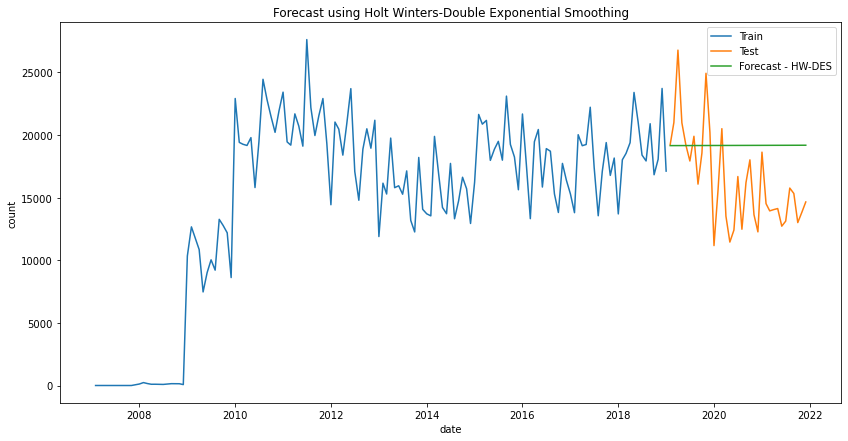

In [159]:
# Plot the number of contract using holtman forecast model using Double Exponential Smoothing
fig = plt.figure(figsize=(14,7))
plt.plot(contract_train.index, contract_train['count'], label='Train')
plt.plot(contract_test.index, contract_test['count'], label='Test')
plt.plot(des_errors_df.index, des_errors_df['Predicted_Count'], label='Forecast - HW-DES')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('count')
plt.title('Forecast using Holt Winters-Double Exponential Smoothing')
plt.show()

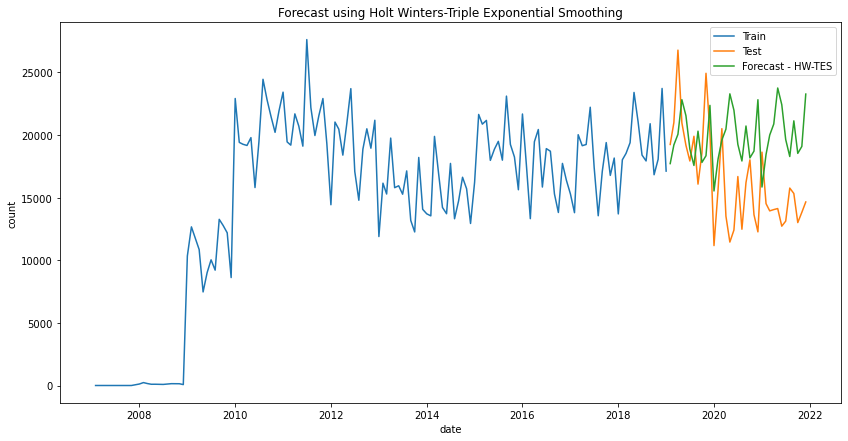

In [160]:
# Plot the number of contract using holtman forecast model using Triple Exponential Smoothing
fig = plt.figure(figsize=(14,7))
plt.plot(contract_train.index, contract_train['count'], label='Train')
plt.plot(contract_test.index, contract_test['count'], label='Test')
plt.plot(tes_errors_df.index, tes_errors_df['Predicted_Count'], label='Forecast - HW-TES')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('count')
plt.title('Forecast using Holt Winters-Triple Exponential Smoothing')
plt.show()

In [161]:
# Define metrics

def mae(err):
    return np.mean(np.abs(err))

def rmse(err):
    return np.sqrt(np.mean(err ** 2))

def mape(err, count=tes_errors_df['count']):
    return np.sum(np.abs(err))/np.sum(count) * 100

#### Extra trees regressor

* Composed of a large number of decision trees, where the final decision is obtained taking into account the prediction of every tree
* When selecting the partition of each node, randomly choose a subset of features

In [102]:
# Fit model
etr_model = ExtraTreesRegressor(n_estimators=100)
etr_model.fit(X_train, y_train)

ExtraTreesRegressor()

In [103]:
# Start the prediction
etr_preds = etr_model.predict(X_test)
print('Prediction is done..')

Prediction is done..


In [104]:
# Check the score for the train and test sets
print('Model Score at Train set: {:.2%}'.format(etr_model.score(X_train, y_train)))
print('Model Score at Test set: {:.2%}'.format(etr_model.score(X_test, y_test)))

Model Score at Train set: 100.00%
Model Score at Test set: 64.79%


In [105]:
# Calculate the errors
etr_errors_df = contract_test[['count']]
etr_errors_df['Predicted_Count'] = etr_preds
etr_errors_df['Error'] = etr_preds - y_test
etr_errors_df.insert(0, 'Modelname', 'ExtreeTreesRegressor')
etr_errors_df.head()

,Modelname,count,Predicted_Count,Error
mese-anno,,,,
2019-02-01,ExtreeTreesRegressor,19251,18622.87,-628.13
2019-03-01,ExtreeTreesRegressor,21004,20863.66,-140.34
2019-04-01,ExtreeTreesRegressor,26785,24137.46,-2647.54
2019-05-01,ExtreeTreesRegressor,20982,24190.28,3208.28
2019-06-01,ExtreeTreesRegressor,19182,20761.09,1579.09


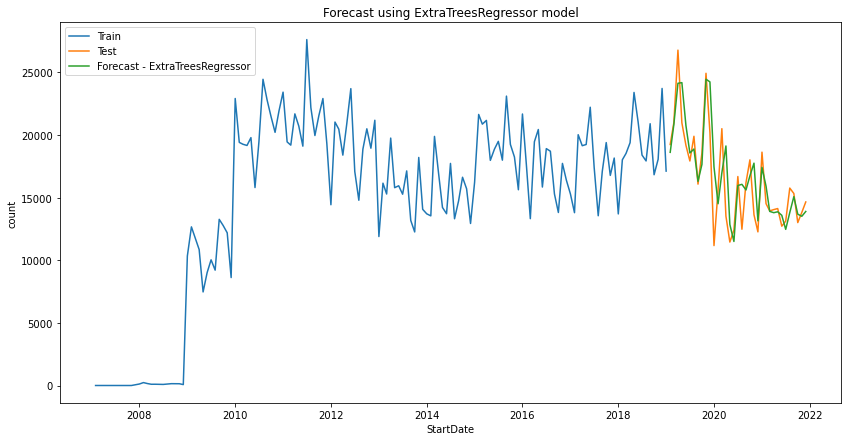

In [106]:
# Show the predictions for Extra Tree Regressor
fig = plt.figure(figsize=(14,7))
plt.plot(contract_train.index, contract_train['count'], label='Train')
plt.plot(contract_test.index, contract_test['count'], label='Test')
plt.plot(etr_errors_df.index, etr_errors_df['Predicted_Count'], label='Forecast - ExtraTreesRegressor')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Forecast using ExtraTreesRegressor model')
plt.show()

#### Linear regression

Model for understanding the relationship between input and output numerical variables. 

In [107]:
# Fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [108]:
# Start the prediction
lr_preds = lr_model.predict(X_test)
print('Prediction is done..')

Prediction is done..


In [109]:
# Calculate the errors
lr_errors_df = contract_test[['count']]
lr_errors_df['Predicted_Count'] = lr_preds
lr_errors_df['Error'] = lr_preds - y_test
lr_errors_df.insert(0, 'Modelname', 'Linear Regression')
lr_errors_df.head()

,Modelname,count,Predicted_Count,Error
mese-anno,,,,
2019-02-01,Linear Regression,19251,17931.072700,-1319.927300
2019-03-01,Linear Regression,21004,19705.060243,-1298.939757
2019-04-01,Linear Regression,26785,24296.921678,-2488.078322
2019-05-01,Linear Regression,20982,24291.663278,3309.663278
2019-06-01,Linear Regression,19182,19672.687868,490.687868


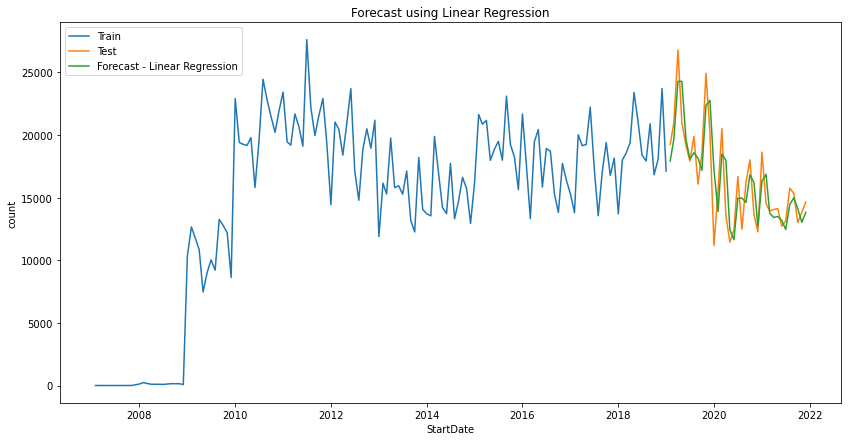

In [110]:
# Show the predictions for Linear Regression
fig = plt.figure(figsize=(14,7))
plt.plot(contract_train.index, contract_train['count'], label='Train')
plt.plot(contract_test.index, contract_test['count'], label='Test')
plt.plot(lr_errors_df.index, lr_errors_df['Predicted_Count'], label='Forecast - Linear Regression')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Forecast using Linear Regression')
plt.show()

#### ARIMA e SARIMAX

In [111]:
# Fit the model
arima_model = ARIMA(bal2['count'], (3,1,3)).fit(disp=False)
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  172
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1614.777
Method:                       css-mle   S.D. of innovations           2883.246
Date:                Thu, 19 May 2022   AIC                           3245.555
Time:                        15:10:25   BIC                           3270.735
Sample:                             1   HQIC                          3255.771
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            83.9007     91.061      0.921      0.357     -94.575     262.376
ar.L1.D.count    -1.0200      0.216     -4.722      0.000      -1.443      -0.597
ar.L2.D.count    -0.7932      0.135     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98678D+00    |proj g|=  1.00473D-01

At iterate    5    f=  6.95698D+00    |proj g|=  6.45637D-02

At iterate   10    f=  6.94861D+00    |proj g|=  1.26154D-01

At iterate   15    f=  6.94276D+00    |proj g|=  2.24664D-01

At iterate   20    f=  6.94034D+00    |proj g|=  4.72390D-02

At iterate   25    f=  6.93805D+00    |proj g|=  1.99315D-01

At iterate   30    f=  6.93681D+00    |proj g|=  2.03433D-02

At iterate   35    f=  6.93654D+00    |proj g|=  8.23608D-02

At iterate   40    f=  6.93509D+00    |proj g|=  4.60214D-02

At iterate   45    f=  6.93455D+00    |proj g|=  7.12628D-02

At iterate   50    f=  6.93396D+00    |proj g|=  1.01206D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

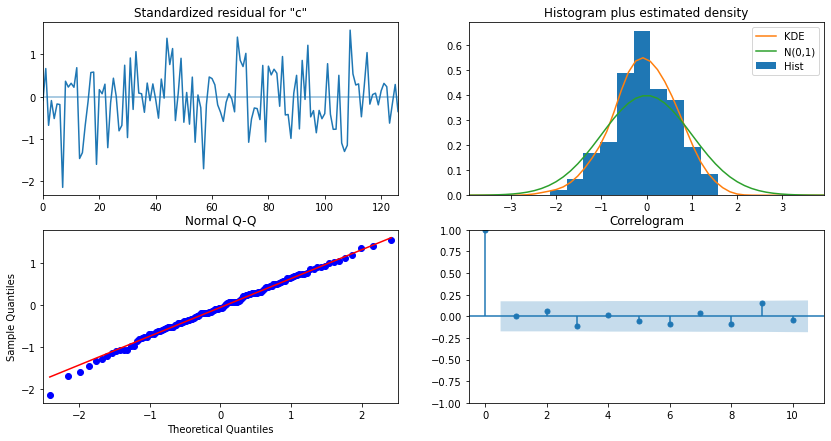

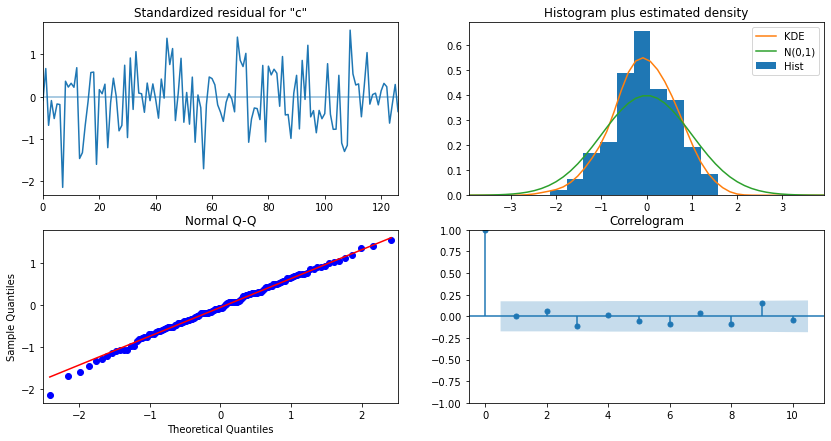

In [183]:
# Fit the model
sarima_model = SARIMAX(bal2['count'], order=(3, 1, 3), seasonal_order=(6, 1, 0, 6), 
                       enforce_invertibility=False, enforce_stationarity=False)
sarima_fit = sarima_model.fit()
sarima_test_df = contract_test[["count"]]
sarima_test_df['Predicted_Count'] = sarima_fit.predict(start=contract_test.index[0],
                                                 end=contract_test.index[-1], dynamic= True)
plot = sarima_fit.plot_diagnostics(figsize=(14,7))
plot

In [115]:
# Evaluation of errors
sarima_test_df['Error'] = sarima_test_df['count'] - sarima_test_df.Predicted_Count
sarima_test_df.insert(0, 'Modelname', 'SARIMA')
sarima_test_df.head()

,Modelname,count,Predicted_Count,Error
mese-anno,,,,
2019-02-01,SARIMA,19251,17029.114125,2221.885875
2019-03-01,SARIMA,21004,21172.989945,-168.989945
2019-04-01,SARIMA,26785,23570.200626,3214.799374
2019-05-01,SARIMA,20982,20159.786375,822.213625
2019-06-01,SARIMA,19182,19087.109694,94.890306


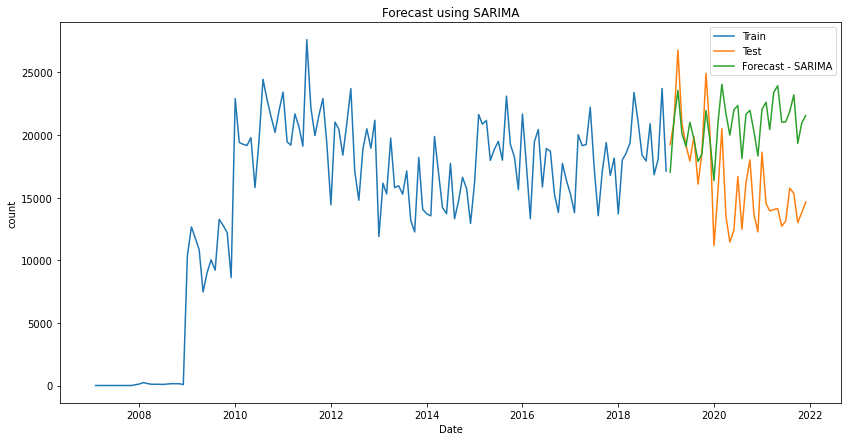

In [116]:
# Show the predictions for SARIMA model
fig = plt.figure(figsize=(14,7))
plt.plot(contract_train.index, contract_train['count'], label='Train')
plt.plot(contract_test.index, contract_test['count'], label='Test')
plt.plot(sarima_test_df.index, sarima_test_df['Predicted_Count'], label='Forecast - SARIMA')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Forecast using SARIMA')
plt.show()

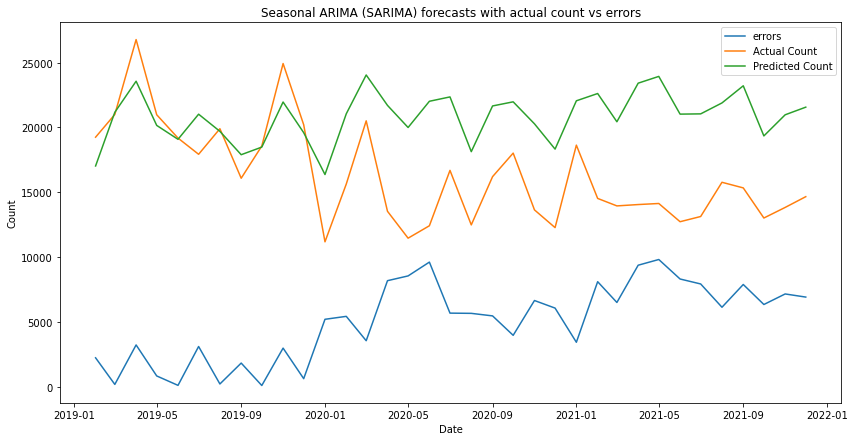

In [117]:
# Show the errors for the predicted and the actual values
plt.figure(figsize=(14,7))
plt.plot(sarima_test_df.index, np.abs(sarima_test_df['Error']), label='errors')
plt.plot(sarima_test_df.index, sarima_test_df['count'], label='Actual Count')
plt.plot(sarima_test_df.index, sarima_test_df['Predicted_Count'], label='Predicted Count')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Seasonal ARIMA (SARIMA) forecasts with actual count vs errors')
plt.show()

#### SVR (Support Vector Regressor)

Regression model that gives  the flexibility to define how much error is acceptable in our model and will find an appropriate line to fit the data.

In [118]:
# Start the prediction
svr_model = sklearn.svm.SVR(kernel='linear', degree=3, C=1.0,).fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
print('Prediction is done...')

# Errors calculation
svr_errors_df = contract_test[['count']]
svr_errors_df['Predicted_Count'] = svr_preds
svr_errors_df['Error'] = svr_preds - y_test
svr_errors_df.insert(0, 'Modelname', 'Support Vector Regressor')
svr_errors_df.head()

Prediction is done...


,Modelname,count,Predicted_Count,Error
mese-anno,,,,
2019-02-01,Support Vector Regressor,19251,18702.160145,-548.839855
2019-03-01,Support Vector Regressor,21004,20387.782401,-616.217599
2019-04-01,Support Vector Regressor,26785,26107.701602,-677.298398
2019-05-01,Support Vector Regressor,20982,26108.374874,5126.374874
2019-06-01,Support Vector Regressor,19182,20367.922313,1185.922313


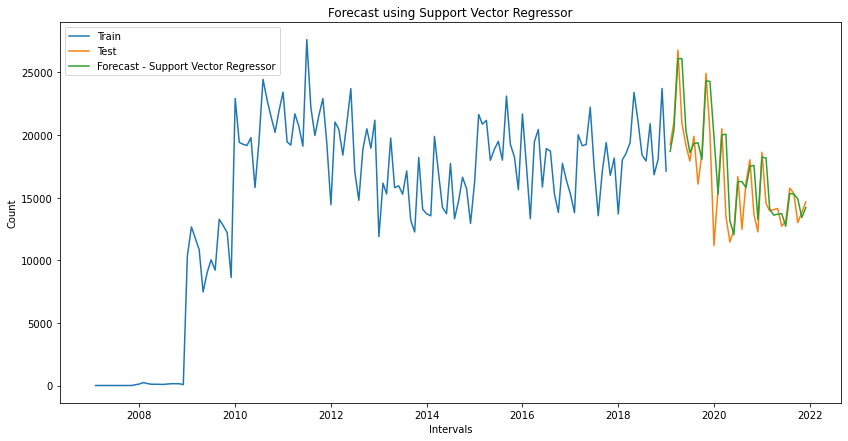

In [119]:
# Show predictions for Support Vector Regressor
fig = plt.figure(figsize=(14,7))
plt.plot(contract_train.index, contract_train['count'], label='Train')
plt.plot(contract_test.index, contract_test['count'], label='Test')
plt.plot(svr_errors_df.index, svr_errors_df['Predicted_Count'], label='Forecast - Support Vector Regressor')
plt.legend(loc='best')
plt.xlabel('Intervals')
plt.ylabel('Count')
plt.title('Forecast using Support Vector Regressor')
plt.show()

#### Compare the different models

To compare the models, we use:
* MAE: Mean Absolute Error is the average over the verification sample of the absolute values of the differences between forecast and the corresponding observation.
* RMSE: Root Mean Squared Error is the square root of the mean of the square of all of the error.
* MAPE: Mean Absolute Percentage Error is a measure of prediction accuracy of a forecasting method in statistics.

In [120]:
# Calculate metrics for SVR
result_df_svr = svr_errors_df.groupby('Modelname').agg(Total_Count=('count', 'sum'),
                                          Total_Pred_Count=('Predicted_Count', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_svr

,Total_Count,Total_Pred_Count,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
Support Vector Regressor,572624,610183.910654,37559.910654,1594.609072,2562.755359,9.746591


In [121]:
# Calculate metrics for SARIMA
result_df_sarima = sarima_test_df.groupby('Modelname').agg(Total_Count=('count', 'sum'),
                                          Total_Pred_Count=('Predicted_Count', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_sarima

,Total_Count,Total_Pred_Count,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
SARIMA,572624,729224.742022,-156600.742022,5058.430063,5863.588594,30.918203


In [162]:
# Calculate metrics for Holtman Winter
result_df_hw = tes_errors_df.groupby('Modelname').agg(Total_Count=('count', 'sum'),
                                          Total_Pred_Count=('Predicted_Count', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_hw

,Total_Count,Total_Pred_Count,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
Holtman- TES,572624,694668.143213,122044.143213,4823.849211,5708.928011,29.484395


In [123]:
# Calculate metrics for Linear regression
result_df_lr = lr_errors_df.groupby('Modelname').agg(Total_Count=('count', 'sum'),
                                          Total_Pred_Count=('Predicted_Count', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_lr

,Total_Count,Total_Pred_Count,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
Linear Regression,572624,574998.073168,2374.073168,1616.342434,2023.652828,9.87943


In [167]:
result_df_etr = etr_errors_df.groupby('Modelname').agg(Total_Count=('count', 'sum'),
                                          Total_Pred_Count=('Predicted_Count', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_etr

,Total_Count,Total_Pred_Count,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
ExtreeTreesRegressor,572624,587479.2,14855.2,1547.588,2199.54999,9.459188


In [168]:
# Create the table with all the previous calculated results
list_objs = [result_df_svr, result_df_lr, result_df_hw, result_df_sarima, result_df_etr]
metrics_table = pd.concat(list_objs)
metrics_table

,Total_Count,Total_Pred_Count,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
Support Vector Regressor,572624,610183.910654,37559.910654,1594.609072,2562.755359,9.746591
Linear Regression,572624,574998.073168,2374.073168,1616.342434,2023.652828,9.879430
Holtman- TES,572624,694668.143213,122044.143213,4823.849211,5708.928011,29.484395
SARIMA,572624,729224.742022,-156600.742022,5058.430063,5863.588594,30.918203
ExtreeTreesRegressor,572624,587479.200000,14855.200000,1547.588000,2199.549990,9.459188


In [169]:
# Check of the model
print('Model Score at Train set: {:.2%}'.format(etr_model.score(X_train, y_train)))
print('Model Score at Test set: {:.2%}'.format(etr_model.score(X_test, y_test)))

Model Score at Train set: 100.00%
Model Score at Test set: 64.79%


Inference: From above metrics it was clear that "Extra Trees Regressor" model performs well out of all 6 models. In addition model score is pretty accurate with (100% for Train data, 96.91% for Test data). Hence, finalizing the model for predicting retail sales and obtaining results in CSV file.

# try to predict with extratree regressor